# Исследование стартапов
- **Автор:** Алиса Гизова
- **Дата:** 15.04.2025

### Описание проекта

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

### Цели и задачи проекта

**Цель:** Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса. 

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.

### Содержимое проекта

1. Знакомство с данными: загрузка и первичная предобработка.
2. Предобработка данных, предварительное исследование.
3. Исследовательский анализ объединённых таблиц.
4. Итоговый вывод и рекомендации.

## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

### Вывод общей информации, исправление названия столбцов

In [7]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеку для визуализации данных
import matplotlib.pyplot as plt

Познакомимся с данными датасета `acquisition.csv` — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [10]:
# Выводим первые строки датафрейма на экран
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [11]:
# Выводим информацию о датафрейме
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [12]:
# Выводим первые строки датафрейма на экран
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Выводим информацию о датафрейме
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Познакомимся с данными датасета `people.csv`:

In [15]:
# Выводим первые строки датафрейма на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [16]:
# Выводим информацию о датафрейме
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Познакомимся с данными датасета `education.csv`:

In [18]:
# Выводим первые строки датафрейма на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [19]:
# Выводим информацию о датафрейме
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Познакомимся с данными датасета `degrees.csv`:

In [21]:
# Выводим первые строки датафрейма на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [22]:
# Выводим информацию о датафрейме
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Познакомимся с данными датасета `fund.csv`:

In [24]:
# Выводим первые строки датафрейма на экран
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [25]:
# Выводим информацию о датафрейме
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Познакомимся с данными датасета `investment.csv`:

In [27]:
# Выводим первые строки датафрейма на экран
investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [28]:
# Выводим информацию о датафрейме
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


---

**Промежуточный вывод**

Датасет `acquisition.csv` содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат числовые (`int64`) и строковые значения (`object`). Данные в столбцах `id`, `acquiring_company_id`, `acquired_company_id` и `price_amount` представлены целочисленным типом данных `int64` — размерность этих данных можно оптимизировать. Значения в столбце `term_code` содержат строковую информацию и представлены типом данных `object`. Значения в столбце `term_code` содержат информацию о дате сделки и должны храниться в типе данных даты и времени `datetime64`.
- Пропуски содержатся в столбцах `term_code` и `acquired_at`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Датасет `company_and_rounds.csv` содержит 22 столбца и 217774 строк, в которых представлена информация о компаниях и раундах финансирования.

По аналогии с предыдущим датасетом можно отметить, что:
- Названия столбцов соответствуют их содержимому, но для удобства работы лучше представить их в стиле snake case.
- Представленные данные содержат числовые (`float64`) и строковые значения (`object`). Значения в столбцах `company  ID`, `investment  rounds`, `funding  rounds`, `funding  total`, `milestones`, `funding  round  id`, `company  id`, `raised  amount`, `pre  money  valuation`, `participants`, `is  first  round` и `is  last  round` содержат целочисленные значения и должны быть представлены типом данных `int64` или целочисленным типом данных с пониженной размерностью. Данные в столбцах `name`, `category  code`, `status`, `domain`, `network  username`, `country  code` и `funding  round  type` содержат строковую информацию и представлены типом данных `object`. Значения в столбцах `founded  at`, `closed  at` и `funded  at` содержат информацию о датах и должны храниться в типе данных даты и времени `datetime64`.
- Пропуски содержатся во всех столбцах датасета.
- Значения в столбцах соответствуют описанию.

Датасет `people.csv` содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках.

Можно отметить, что:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат числовые (`float64` и `int64`) и строковые значения (`object`). Значения в столбце `id` содержат целочисленные значения и представлены типом данных `int64` — размерность этих данных можно оптимизировать. Данные в столбцах `first_name`, `last_name` и `network_username` содержат строковую информацию и представлены типом данных `object`. Значения в столбце `company_id` содержат целочисленные данные и должны быть представлены типом данных `int64` или целочисленным типом данных с пониженной разрядностью.
- Пропуски содержатся в столбцах `first_name`, `last_name`, `company_id` и `network_username`.
- Значения в столбцах соответствуют описанию.

Датасет `education.csv` содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудников.

Можно отметить, что:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат числовые (`int64`) и строковые значения (`object`). Значения в столбцах `id` и `person_id` содержат целочисленные значения и представлены типом данных `int64` — размерность этих данных можно оптимизировать. Данные в столбце `instituition` содержат строковую информацию и представлены типом данных `object`. Значения в столбце `graduated_at` содержат информацию о дате получения образования и должны храниться в типе данных даты и времени `datetime64`.
- Пропуски содержатся в столбцах `instituition` и `graduated_at`.
- Значения в столбцах соответствуют описанию.

Датасет `degrees.csv` содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудников.

Можно отметить, что:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат числовые (`int64`) и строковые значения (`object`). Значения в столбце `id` содержат целочисленные значения и представлены типом данных `int64` — размерность этих данных можно оптимизировать. Данные в столбце `subject` содержат строковую информацию и представлены типом данных `object`. Столбец `degree_type` хранит текстовые данные, но их можно рассматривать как категориальные признаки. В этом случае можно использовать тип `category` либо оставить тип `object`. Столбец `object_id` содержит информацию об идентификаторах сотрудников и, скорее всего, содержит ошибку — символы `р:` перед идентификатором. Стоит удалить данные символы и преобразовать тип данных в целочисленный.
- Пропуски содержатся в столбцах `degree_type` и `subject`.
- Значения в столбцах соответствуют описанию.

Датасет `fund.csv` содержит 9 столбцов и 11652 строк, в которых представлена информация о фондах.

Можно отметить, что:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат числовые (`int64`) и строковые значения (`object`). Значения в столбцах `id`, `investment_rounds`, `invested_companies` и `milestones` содержат целочисленные значения и представлены типом данных `int64` — размерность этих данных можно оптимизировать. Данные в столбцах `name`, `domain`, `network_username` и `country_code` содержат строковую информацию и представлены типом данных `object`. Значения в столбце `founded_at` содержат информацию о дате создания фонда и должны храниться в типе данных даты и времени `datetime64`.
- Пропуски содержатся в столбцах `name`, `founded_at`, `domain`, `network_username` и `country_code`.
- Значения в столбцах соответствуют описанию.

Датасет `investment.csv` содержит 4 столбца и 61403 строк, в которых представлена информация о раундах инвестирования.

Можно отметить, что:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат только числовые значения (`int64`). Значения в столбцах `id`, `funding_round_id`, `company_id` и `fund_id` содержат целочисленные значения и представлены типом данных `int64` — размерность этих данных можно оптимизировать.
- Пропусков в столбцах не обнаружено.
- Значения в столбцах соответствуют описанию.

После анализа типов данных видно, что присутствуют столбцы, типы данных которых представлены некорректно. Для оптимизации работы с данными можно преобразовать данные в столбцах в подходящий для каждого столбца тип данных. Также стоит отметить, что в столбцах встречаются пропуски, которые необходимо обработать. Названия столбцов отражают содержимое данных и представлены в стиле snake case (кроме датасета `company_and_rounds`).

Преобразуем названия столбцов в датафрейме `company_and_rounds` в стиль snake case.

In [31]:
# Выводим названия столбцов датафрейма
print(company_and_rounds_df.columns)

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')


In [32]:
# Преобразуем названия столбцов датафрейма в стиль snake case
company_and_rounds_df = company_and_rounds_df.rename(columns={'company  ID':'company_id',
                                                             'category  code':'category_code',
                                                             'founded  at':'founded_at',
                                                             'closed  at':'closed_at',
                                                             'network  username':'network_username',
                                                             'country  code':'country_code',
                                                             'investment  rounds':'investment_rounds',
                                                             'funding  rounds':'funding_rounds',
                                                             'funding  total':'funding_total',
                                                             'funding  round  id':'funding_round_id',
                                                             'company  id':'company_id_',
                                                             'funded  at':'funded_at',
                                                             'funding  round  type':'funding_round_type',
                                                             'raised  amount':'raised_amount',
                                                             'pre  money  valuation':'pre_money_valuation',
                                                             'is  first  round':'is_first_round',
                                                             'is  last  round':'is_last_round'})

In [33]:
# Выводим названия столбцов датафрейма после преобразования
print(company_and_rounds_df.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')


Все названия столбцов теперь в едином стиле.

### Смена типов и анализ пропусков

In [36]:
# Преобразовываем некоторые столбцы к типу данных даты и времени
list_to_datetime = [
    [acquisition_df, ['term_code', 'acquired_at']],
    [company_and_rounds_df, ['founded_at', 'closed_at', 'funded_at']],
    [education_df, ['graduated_at']],
    [fund_df, ['founded_at']]
]

for item in list_to_datetime:
    df, columns = item
    for column in columns:
        df[column] = pd.to_datetime(df[column], format='%Y-%m-%d', errors='coerce')

In [37]:
# Подсчитываем долю строк с пропусками для датафрейма acquisition_df
(acquisition_df.isna().sum() / acquisition_df.shape[0] * 100).sort_values(ascending=False)

term_code               100.000000
acquired_at               0.308281
id                        0.000000
acquiring_company_id      0.000000
acquired_company_id       0.000000
price_amount              0.000000
dtype: float64

In [38]:
# Подсчитываем долю строк с пропусками для датафрейма company_and_rounds_df
(company_and_rounds_df.isna().sum() / company_and_rounds_df.shape[0] * 100).sort_values(ascending=False)

closed_at              98.416248
funded_at              75.809784
is_last_round          75.695905
funding_round_type     75.695905
is_first_round         75.695905
participants           75.695905
pre_money_valuation    75.695905
raised_amount          75.695905
funding_round_id       75.695905
company_id_            75.695905
network_username       56.131586
country_code           50.128574
founded_at             49.509124
category_code          33.928752
domain                 32.425818
name                    0.139135
company_id              0.138676
milestones              0.138676
funding_rounds          0.138676
investment_rounds       0.138676
status                  0.138676
funding_total           0.138676
dtype: float64

In [39]:
# Подсчитываем долю строк с пропусками для датафрейма education_df
(education_df.isna().sum() / education_df.shape[0] * 100).sort_values(ascending=False)

graduated_at    47.035854
instituition     0.050178
id               0.000000
person_id        0.000000
dtype: float64

In [40]:
# Подсчитываем долю строк с пропусками для датафрейма people_df
(people_df.isna().sum() / people_df.shape[0] * 100).sort_values(ascending=False)

company_id          84.731528
network_username    82.855996
first_name           0.003970
last_name            0.001764
id                   0.000000
dtype: float64

In [41]:
# Подсчитываем долю строк с пропусками для датафрейма degrees_df
(degrees_df.isna().sum() / degrees_df.shape[0] * 100).sort_values(ascending=False)

subject        25.829760
degree_type    10.237205
id              0.000000
object_id       0.000000
dtype: float64

In [42]:
# Подсчитываем долю строк с пропусками для датафрейма fund_df
(fund_df.isna().sum() / fund_df.shape[0] * 100).sort_values(ascending=False)

network_username      81.556814
founded_at            60.478888
country_code          39.469619
domain                36.817714
name                   0.025747
id                     0.000000
investment_rounds      0.000000
invested_companies     0.000000
milestones             0.000000
dtype: float64

In [43]:
# Подсчитываем долю строк с пропусками для датафрейма investment_df
(investment_df.isna().sum() / investment_df.shape[0] * 100).sort_values(ascending=False)

id                  0.0
funding_round_id    0.0
company_id          0.0
fund_id             0.0
dtype: float64

Во всех датасетах, кроме `investment_df`, содержатся столбцы с пропусками. Больше всего вопросов вызывает датасет `company_and_rounds_df` в котором пропуски присутствуют во всех столбцах, а примерно в половине их доля составляет более 75%. Для того, чтобы понять, можно ли использовать представленные данные для ответов на вопросы бизнеса, необходимо провести предварительное исследование.

## Шаг 2. Предобработка данных, предварительное исследование

### Раунды финансирования по годам

In [47]:
# Добавляем столбец с годом финансирования
company_and_rounds_df['funded_at_year'] = company_and_rounds_df['funded_at'].dt.year

In [48]:
# Создаем сводную таблицу
pivot_company_and_rounds = pd.pivot_table(company_and_rounds_df,
                                          index='funded_at_year',
                                          values='raised_amount',
                                          aggfunc={'raised_amount':['median','count']})

# Фильтруем таблицу по количеству раундов финансирования
pivot_company_and_rounds = pivot_company_and_rounds.loc[pivot_company_and_rounds['count'] > 50]

print(pivot_company_and_rounds)

                count     median
funded_at_year                  
1999.0             76  2000000.0
2000.0            125  4200000.0
2001.0             96  3000000.0
2002.0            116  4200000.0
2003.0            159  3000000.0
2004.0            291  5000000.0
2005.0           1633  5500000.0
2006.0           2436  5000000.0
2007.0           3279  3973320.0
2008.0           3774  3110000.0
2009.0           4151  2000000.0
2010.0           6221  1602500.0
2011.0           9204  1200000.0
2012.0           9970  1000000.0
2013.0          11072  1200000.0


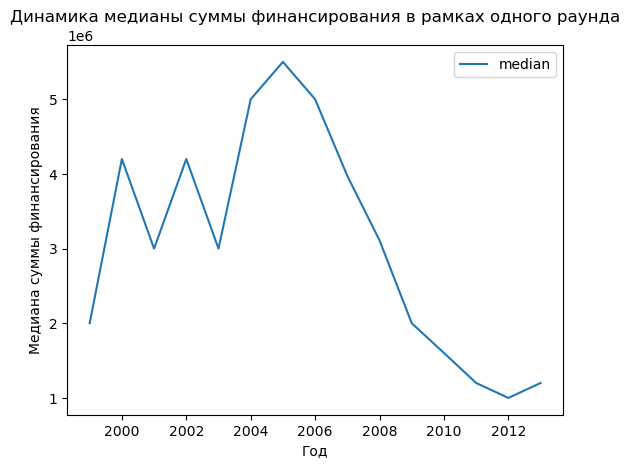

In [49]:
# Сбрасываем индекс в таблице
pivot_company_and_rounds = pivot_company_and_rounds.reset_index()

# Строим линейный график
pivot_company_and_rounds.plot.line(
    x='funded_at_year',
    y='median',
    title='Динамика медианы суммы финансирования в рамках одного раунда')

plt.xlabel('Год')
plt.ylabel('Медиана суммы финансирования')
plt.show()

Анализ данных на графике показывает, что в 2005 году типичный размер собранных в рамках одного раунда средств был максимален.

В 2013 году количество раундов и выделяемых в рамках каждого раунда средств выросло по сравнению с предыдущим годом. 

### Люди и их образование

In [52]:
# Соединяем данные в единый датафрейм
people_education_df = people_df.merge(education_df, how='left', left_on='id', right_on='person_id')

In [53]:
# Выводим первые строки объединенного датафрейма
# Соединяем данные в единый датафрейм
people_education_df.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [54]:
# Группируем данные по количеству работников для каждой компании
grouped = people_education_df.groupby('company_id').agg({'id_x':'count', 'id_y':'count'})

In [55]:
# Изучаем статистические показатели столбца c количеством оотрудников в компании
grouped['id_x'].describe()

count    22922.000000
mean         1.953974
std          4.087373
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        376.000000
Name: id_x, dtype: float64

Видим, что больше половины компаний в датафрейме имеют одного сотрудника. Разделим компании на три группы по количеству сотрудников:

- 1 сотрудник;
- 2 сотрудника;
- больше 2-х сотрудников.

In [57]:
# Определяем функцию, которая создаст новый столбец с категорией компании по количеству сотрудников
def create_company_category(x):
    if x == 1:
        return '1 сотрудник'
    if x == 2:
        return '2 сотрудника'
    return 'больше 2-х сотрудников'

In [58]:
# Создаём столбец company_category с помощью функции create_company_category
grouped['company_category'] = grouped['id_x'].apply(create_company_category)

In [59]:
# Проверяем распределение данных по значениям столбца company_category
print('Распределение данных по значениям столбца company_category:')
grouped['company_category'].value_counts()

Распределение данных по значениям столбца company_category:


company_category
1 сотрудник               14150
2 сотрудника               4735
больше 2-х сотрудников     4037
Name: count, dtype: int64

In [60]:
# Создаём столбец с долей сотрудников без информации об образовании  
grouped['not_inf'] = (grouped['id_x'] - grouped['id_y']) / grouped['id_x']

In [61]:
# Вычисляем среднюю долю сотрудников без информации об образовании в каждой из групп
grouped.groupby('company_category').agg({'not_inf':'mean'})

,not_inf
company_category,
1 сотрудник,0.592297
2 сотрудника,0.226610
больше 2-х сотрудников,0.260353


Доля сотрудников без информации об образовании лежит в диапазоне 22-59% для различных групп по количеству сотрудников компании.

На этапе предварительного изучения данных было установлено, что столбец `object_id` содержит информацию об идентификаторах сотрудников и, скорее всего, содержит ошибку — символы `р:` перед идентификатором. Можно удалить данные символы и тогда можно попробовать присоединить датафрейм degrees_df к обединенному выше датафрейму.

In [63]:
# Найдем уникальные значения в столбце с именем network_username датафреймов
unique_company_and_rounds = set(company_and_rounds_df['network_username'])
unique_people = set(people_df['network_username'])
unique_fund = set(fund_df['network_username'])

In [64]:
# Найдем процент пересечений значений в датафреймах company_and_rounds_df и people_df
intersection = unique_company_and_rounds & unique_people
(len(intersection) / len(company_and_rounds_df)) * 100

1.010221605885

In [65]:
# Найдем процент пересечений значений в датафреймах people_df и fund_df
intersection = unique_people & unique_fund
(len(intersection) / len(people_df)) * 100

0.035287527182423284

In [66]:
# Найдем процент пересечений значений в датафреймах company_and_rounds_df и fund_df
intersection = unique_company_and_rounds & unique_fund
(len(intersection) / len(company_and_rounds_df)) * 100

0.032602606371743184

Процент пересечений по значениям столбца `network_username` низкий (менее 2%), поэтому объединять датафреймы по нему не стоит, чтобы не потерять данные.

### Проблемный датасет и причина возникновения пропусков

In [69]:
# Выводим первые строки датафрейма на экран
company_and_rounds_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Выводим информацию о датафрейме
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Судя по порядку столбцов и количеству пропусков в них, можно предположить, что информация о раундах финансирования, начиная со столбца `funding_round_id`, раньше хранилась в отдельной таблице. Такое большое количество пропусков (~76%) в данных столбцах может указывать на ошибку при объединении данных о компаниях и раундах финансирования.
Для удобства работы с данными, раздели датафрейм на два новых: один датафрейм будет содержать данные по компаниям, другой - данные по раундам финансирования.

In [72]:
# Создадим датафрейм с данным о компаниях
company_df = company_and_rounds_df.iloc[:, 0:13]

# Выведем информацию о новом датафрейме
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217471 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [73]:
# Создадим датафрейм с данным о раундах финансирования
rounds_df = company_and_rounds_df.iloc[:, 13:]

# Выведем информацию о новом датафрейме
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_          52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_at_year       52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 16.6+ MB


Теперь проверим пропуски и дубликаты в каждом из полученных датафреймов. Начнем с датафрейма `company_df`.

In [75]:
# Применяем метод isna() к датафрейму
company_df.isna().sum().sort_values(ascending=False)

closed_at            214325
network_username     122240
country_code         109167
founded_at           107818
category_code         73888
domain                70615
name                    303
company_id              302
status                  302
investment_rounds       302
funding_rounds          302
funding_total           302
milestones              302
dtype: int64

In [76]:
# Подсчитываем долю строк с пропусками
(company_df.isna().sum() / company_df.shape[0] * 100).sort_values(ascending=False)

closed_at            98.416248
network_username     56.131586
country_code         50.128574
founded_at           49.509124
category_code        33.928752
domain               32.425818
name                  0.139135
company_id            0.138676
status                0.138676
investment_rounds     0.138676
funding_rounds        0.138676
funding_total         0.138676
milestones            0.138676
dtype: float64

Процент пропусков в столбцах `company_id`, `milestones`, `name`, `funding_rounds`, `investment_rounds`, `status` и `funding_total` менее 1%, поэтому их можно удалить.

In [78]:
# Удалим пропуски в столбцах
company_df = company_df.dropna(subset=['name'])

In [79]:
# Подсчитываем долю строк с пропусками после удаления пропусков
(company_df.isna().sum() / company_df.shape[0] * 100).sort_values(ascending=False)

closed_at            98.414501
network_username     56.070465
country_code         50.059088
founded_at           49.439236
category_code        33.836695
domain               32.331667
company_id            0.000000
name                  0.000000
status                0.000000
investment_rounds     0.000000
funding_rounds        0.000000
funding_total         0.000000
milestones            0.000000
dtype: float64

Доля пропусков в остальных столбцах слишком велика, чтобы их удалять. Пока оставим их без изменений.

In [81]:
# Проверяем полные дубликаты в датафрейме
company_df.duplicated().sum()

20919

Найдено 20919 явных дубликатов. Их необходимо удалить, предварительно отсортировав датафрейм.

In [83]:
# Сортируем датафрейм по всем столбцам
company_df = company_df.sort_values(by=list(company_df.columns))

# Удаляем явные дубликаты
company_df = company_df.drop_duplicates()

In [84]:
# Проверяем неявные дубликаты в датафрейме
company_df.duplicated(subset=['company_id']).sum()

0

Неявных дубликатов не обнаружено. Теперь перейдем к датафрейму `rounds_df`.

In [86]:
# Применяем метод isna() к датафрейму
rounds_df.isna().sum().sort_values(ascending=False)

funded_at              165094
funded_at_year         165094
funding_round_id       164846
company_id_            164846
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [87]:
# Подсчитываем долю строк с пропусками
(rounds_df.isna().sum() / rounds_df.shape[0] * 100).sort_values(ascending=False)

funded_at              75.809784
funded_at_year         75.809784
funding_round_id       75.695905
company_id_            75.695905
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64

В новом датафрейме можно удалить строки с пропусками по столбцу `company_id_`.

In [89]:
# Удалим пропуски в столбцах
rounds_df = rounds_df.dropna(subset=['company_id_'])

In [90]:
# Подсчитываем долю строк с пропусками после удаления пропусков
(rounds_df.isna().sum() / rounds_df.shape[0] * 100).sort_values(ascending=False)

funded_at              0.468561
funded_at_year         0.468561
funding_round_id       0.000000
company_id_            0.000000
funding_round_type     0.000000
raised_amount          0.000000
pre_money_valuation    0.000000
participants           0.000000
is_first_round         0.000000
is_last_round          0.000000
dtype: float64

Процент пропусков в столбцах `funded_at` и `funded_at_year` (был добавлен в процессе предварительного анализа) менее 1%, поэтому их можно удалить.

In [92]:
# Удалим пропуски в столбцах
rounds_df = rounds_df.dropna(subset=['funded_at', 'funded_at_year'])

In [93]:
# Подсчитываем долю строк с пропусками после удаления пропусков
(rounds_df.isna().sum() / rounds_df.shape[0] * 100).sort_values(ascending=False)

funding_round_id       0.0
company_id_            0.0
funded_at              0.0
funding_round_type     0.0
raised_amount          0.0
pre_money_valuation    0.0
participants           0.0
is_first_round         0.0
is_last_round          0.0
funded_at_year         0.0
dtype: float64

In [94]:
# Проверяем полные дубликаты в датафрейме
rounds_df.duplicated().sum()

0

In [95]:
# Проверяем неявные дубликаты в датафрейме
rounds_df.duplicated(subset=['company_id_']).sum()

20945

In [96]:
# Удаляем неявные дубликаты в датафрейме
rounds_df = rounds_df.drop_duplicates(subset=['company_id_'])

In [97]:
# Проверяем неявные дубликаты в датафрейме после удаления
rounds_df.duplicated(subset=['company_id_']).sum()

0

Датафрейм `company_and_rounds_df` был разделен на два датафрейма: `company_df` и `rounds_df`. Были удалены пропуски в некоторых столбцах, в остальных столбцах пропуски оставлены без изменений, так как их процент довольно большой и их удаление может привести к потере данных. В датафреймах удалены явные и неявные дубликаты.

## Шаг 3. Исследовательский анализ объединённых таблиц

### Объединение данных

In [101]:
# Соединяем данные в единый датафрейм
companies_df = company_df.merge(rounds_df, how='left', left_on='company_id', right_on='company_id_')

In [102]:
# Фильтруем датафрейм
companies_df = companies_df.loc[(companies_df['funding_rounds'] > 0)
                              | (companies_df['investment_rounds'] > 0)
                              | (companies_df['status'] == 'acquired')]

In [103]:
# Выводим первые строки объединенного датафрейма на экран
companies_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
3,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,...,1.0,4.0,2006-12-01,series-b,8500000.0,0.0,2.0,0.0,0.0,2006.0
4,5.0,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,...,2.0,5.0,2004-09-01,angel,500000.0,0.0,2.0,0.0,1.0,2004.0
5,7.0,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0.0,...,225.0,7.0,2006-12-01,angel,800000.0,0.0,4.0,1.0,1.0,2006.0
6,8.0,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# Выводим информацию о полученном датафрейме
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 0 to 196551
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           40747 non-null  float64       
 1   name                 40747 non-null  object        
 2   category_code        35315 non-null  object        
 3   status               40747 non-null  object        
 4   founded_at           27807 non-null  datetime64[ns]
 5   closed_at            2128 non-null   datetime64[ns]
 6   domain               35754 non-null  object        
 7   network_username     20850 non-null  object        
 8   country_code         34742 non-null  object        
 9   investment_rounds    40747 non-null  float64       
 10  funding_rounds       40747 non-null  float64       
 11  funding_total        40747 non-null  float64       
 12  milestones           40747 non-null  float64       
 13  funding_round_id     31507 non-null

### Анализ выбросов

In [106]:
# Перед анализом типичных значений размера финансирования отфильтруем нулевые значения
companies_df_filtred = companies_df.loc[companies_df['funding_total'] > 0]

In [107]:
# Изучаем статистические показатели столбца c суммой финансирования для одной компании
companies_df_filtred['funding_total'].describe()

count    2.787400e+04
mean     1.481652e+07
std      6.775936e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.564500e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

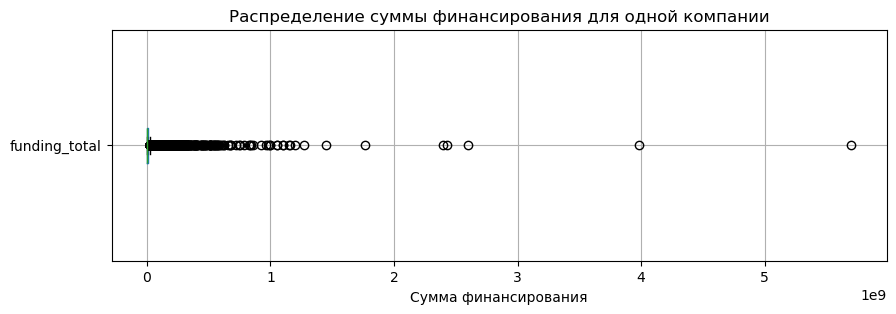

In [108]:
plt.figure(figsize=(10, 3))

# Строим диаграмму размаха значений в столбце funding_total
companies_df_filtred.boxplot(column='funding_total', vert=False)

plt.title('Распределение суммы финансирования для одной компании')
plt.xlabel('Сумма финансирования')

plt.show()

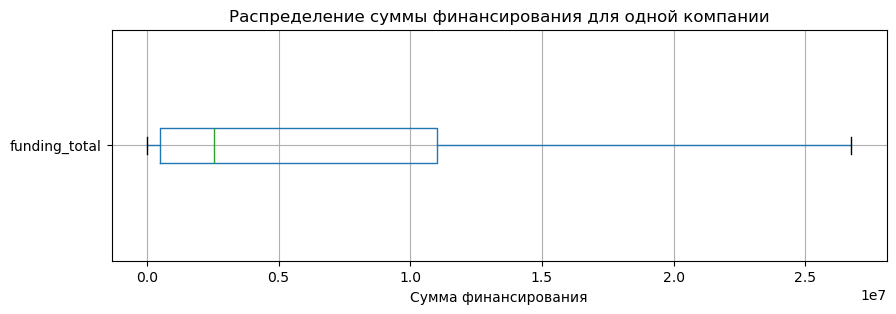

In [109]:
plt.figure(figsize=(10, 3))

# Строим диаграмму размаха значений в столбце funding_total, отключив отображение выбросов на диаграмме
companies_df_filtred.boxplot(column='funding_total', vert=False, showfliers=False)

plt.title('Распределение суммы финансирования для одной компании')
plt.xlabel('Сумма финансирования')

plt.show()

- Медиана суммы финансирования для одной компании составляет порядка 2500000 долларов.
- Существенная разница между средним и медианным значением указывает на большой разброс данных, который мы можем наблюдать на диаграмме размаха.
- Большая разница между минимальным и максимальным значением говорит о том, что обычные способы нахождения типичных значений, например, нахождение среднего значения, будут искажать данные.

### Куплены забесплатно?

In [112]:
# Соединяем данные в единый датафрейм
acquired_companies_df = companies_df.merge(acquisition_df, how='left', left_on='company_id', right_on='acquired_company_id')

In [113]:
# Фильтруем датафрейм
acquired_companies_df_filtred = acquired_companies_df.loc[(acquired_companies_df['funding_total'] > 0)
                              | (acquired_companies_df['price_amount'] <= 1)]

In [114]:
# Вычисляем квартили Q1 и Q3
Q1 = acquired_companies_df_filtred['funding_total'].quantile(0.25)
Q3 = acquired_companies_df_filtred['funding_total'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем нижний и верхний пороги для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Нижний порог выбросов: {lower_bound}')
print(f'Верхний порог выбросов: {upper_bound}')

Нижний порог выбросов: -12475000.0
Верхний порог выбросов: 21085000.0


Границы выбросов соответствуют первому и третьему квартилям, то есть 25-у и 75-у процентилям соответственно.


### Цены стартапов по категориям

In [117]:
# Отфильтруем нулевые значения
acquired_companies_df_filtred = acquired_companies_df.loc[acquired_companies_df['price_amount'] > 0]

In [118]:
# Создаем сводную таблицу
pivot_company_category = pd.pivot_table(acquired_companies_df_filtred,
                                          index='category_code',
                                          values='price_amount',
                                          aggfunc={'price_amount':['count','median','max','min']})

In [119]:
# Изучаем статистические показатели столбца с количеством компаний в каждой категории
pivot_company_category['count'].describe()

count     37.000000
mean      54.000000
std       86.438482
min        1.000000
25%        4.000000
50%       19.000000
75%       74.000000
max      403.000000
Name: count, dtype: float64

Далее будем рассматривать категории, в которых количество проданных компаний превышает медианное значение.

In [121]:
# Фильтруем таблицу по количеству проданных компаний в каждой категории
pivot_company_category = pivot_company_category.loc[pivot_company_category['count'] > 19]

In [122]:
# Вычисляем разброс цен для каждой компании
pivot_company_category['range_price'] = pivot_company_category['max'] - pivot_company_category['min']

In [123]:
# Сортируем таблицу
top_company_category = pivot_company_category.sort_values(by=['median','range_price'], ascending=False)

In [124]:
# Выведем топ-7 категорий из 37-и
top_company_category.head(7)

,count,max,median,min,range_price
category_code,,,,,
manufacturing,21,4.050000e+09,351000000.0,373.0,4.050000e+09
biotech,263,2.000000e+10,200000000.0,109000.0,1.999989e+10
cleantech,39,3.750000e+09,185000000.0,450000.0,3.749550e+09
finance,20,4.400000e+09,171500000.0,1200000.0,4.398800e+09
security,36,7.680000e+09,164500000.0,1850000.0,7.678150e+09
ecommerce,50,1.250000e+09,157500000.0,11.0,1.250000e+09
public_relations,74,3.900000e+10,110000000.0,25000.0,3.899998e+10


Определены категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен:
- промышленность;
- биотехнологии;
- экологически чистые технологии;
- финансы;
- безопасность;
- электронная коммерция;
- связи с общественностью.


### Сколько раундов продержится стартап перед покупкой

In [127]:
# Отфильтруем нулевые значения
companies_df = companies_df.loc[companies_df['funding_rounds'] > 0]

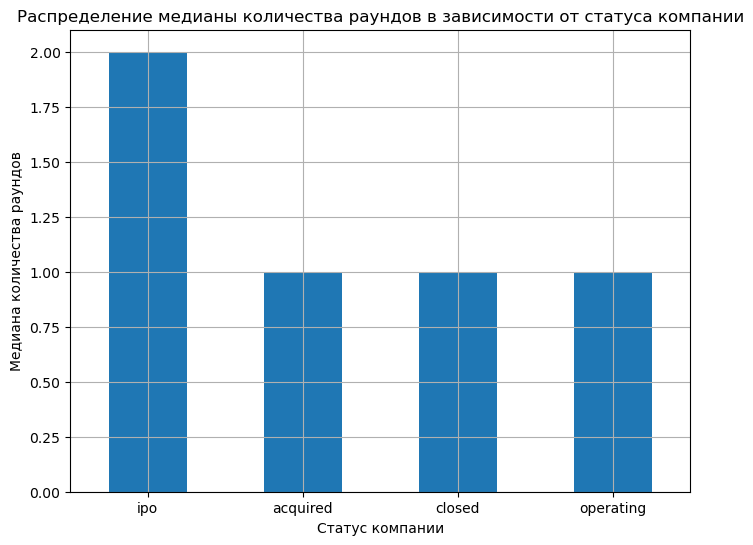

In [128]:
# Строим график столбчатой диаграммы
companies_df.groupby('status')['funding_rounds'].median().sort_values(ascending=False).plot(kind='bar',
             rot=0,
             legend=False,
             figsize=(8, 6)
)

plt.title('Распределение медианы количества раундов в зависимости от статуса компании')
plt.xlabel('Статус компании')
plt.ylabel('Медиана количества раундов')
plt.grid()

plt.show()

Определена медиана количества раундов финансирования для каждого статуса компании. Для статусов `acquired`, `closed` и `operating` она составляет 1 раунд, для статуса `ipo` - 2 раунда.


## Шаг 4. Итоговый вывод и рекомендации

В ходе исследования проанализировали исторические данные о инвестиционном рынке стартапов из семи таблиц. Данные включали информацию о покупках одними компаниями других компаний, информация о компаниях и раундах финансирования, информация о сотрудниках и их образовании и информацию о фондах и раундах инвестирования. Исследование включало подготовку датасета, проверку соответствия данных здравому смыслу, а также ответы на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

### Предообработка данных и предварительное исследование

- В 2005 году типичный размер собранных в рамках одного раунда средств был максимален. В 2013 году количество раундов и выделяемых в рамках каждого раунда средств выросло по сравнению с предыдущим годом.
- Доля сотрудников без информации об образовании лежит в диапазоне 22-59% для различных групп по количеству сотрудников компании.
- Процент пересечений по значениям столбца network_username низкий (менее 2%), поэтому объединять датафреймы по данному столбцу не стоит, чтобы не потерять данные.
- Для удобства работы с данными, разделили датафрейм `company_and_rounds` на два новых: один датафрейм будет содержит данные по компаниям, другой - данные по раундам финансирования.

### Исследовательский анализ объединённых таблиц

- Медиана суммы финансирования для одной компании составляет порядка 2500000 долларов.
- Определены категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен:
    - промышленность;
    - биотехнологии;
    - экологически чистые технологии;
    - финансы;
    - безопасность;
    - электронная коммерция;
    - связи с общественностью.
- Определена медиана количества раундов финансирования для каждого статуса компании. Для статусов `acquired`, `closed` и `operating` она составляет 1 раунд, для статуса `ipo` - 2 раунда.

### Рекомендации

При дальнейшем анализе инвестиционного рынка стартапов стоит:
- Учитывать сегментацию по категориям стартапов при оценке инвестиционных рисков и потенциала;
- Дополнить данные об образовании сотрудников для более точного анализа кадрового фактора;
- Использовать медианные значения (а не средние) для оценки типичных показателей из-за возможных выбросов;
- Изучить причины роста числа раундов в 2013 году для прогнозирования будущих трендов.